In [ ]:
!pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-_n8iulog
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-_n8iulog
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.7 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369490 sha256=f19fe815ff1f5531f70f7a9825c7e19c4e2f3527b130da73c6a8eadc536e40a4
  Stored in directory: /tmp/pip-ephem-wheel-cache-ycsxax_9/wheels/35/3e/df/3d24cbfb3b6a06f17a2bfd7d1138900d4365d9028aa8f6e92f
Successfully built clip


In [ ]:
'''
import torch
import clip
from PIL import Image

# Load pre-trained CLIP model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

# Function to encode images
def encode_image(image_path):
    image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)
    with torch.no_grad():
        image_features = model.encode_image(image)
    return image_features

# Function to encode text
def encode_text(text):
    text_inputs = clip.tokenize([text]).to(device)
    with torch.no_grad():
        text_features = model.encode_text(text_inputs)
    return text_features

# Example usage
image_path = "bankimages/FundTransfer.jpg"
text_query = "how to do NEFT Fund Transfer"

image_embedding = encode_image(image_path)
text_embedding = encode_text(text_query)

# Calculate similarity
similarity = torch.nn.functional.cosine_similarity(image_embedding, text_embedding)
print(similarity)
'''

100%|███████████████████████████████████████| 338M/338M [00:09<00:00, 37.2MiB/s]


tensor([0.2601])


In [ ]:
# Load pre-trained CLIP model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

# Define the directory path
image_dir = "bankimages"

# Initialize lists
preprocessed_images = []
image_paths = []

# Iterate through files in the directory
for filename in os.listdir(image_dir):
    # Check if the file is an image (basic check)
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        image_path = os.path.join(image_dir, filename)
        try:
            # Open and preprocess the image
            image = Image.open(image_path).convert("RGB")
            preprocessed_image = preprocess(image)

            # Append to lists
            preprocessed_images.append(preprocessed_image)
            image_paths.append(image_path)
        except Exception as e:
            print(f"Error processing image {image_path}: {e}")

print(f"Loaded and preprocessed {len(preprocessed_images)} images.")

Loaded and preprocessed 9 images.


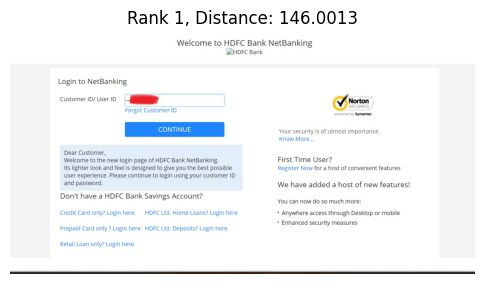

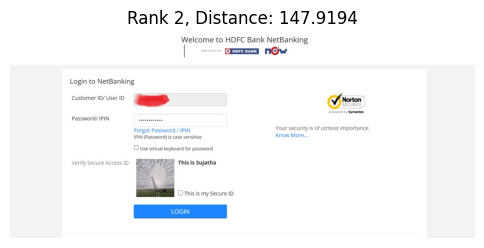

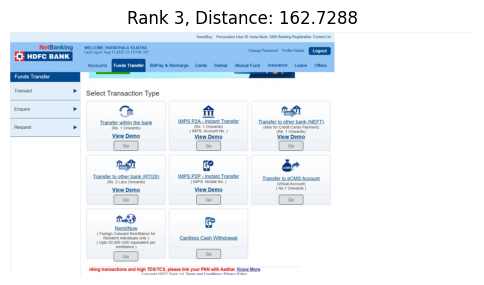

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Iterate through the indices obtained from the FAISS search
for i in range(k):
    # Retrieve the corresponding image path
    image_index = indices[0][i]
    image_path = loaded_image_paths[image_index]
    distance = distances[0][i]

    # Open the image file
    image = Image.open(image_path)

    # Display the image
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.title(f"Rank {i+1}, Distance: {distance:.4f}")
    plt.axis('off')
    plt.show()

In [ ]:
# Define the number of nearest neighbors to search for
k = 3

# Search the FAISS index for the k nearest neighbors to the text embedding
distances, indices = loaded_index.search(text_embedding_np, k)

# Print a confirmation message
print(f"Search complete. Found {k} nearest neighbors.")
print(f"Shape of resulting indices: {indices.shape}")

Search complete. Found 3 nearest neighbors.
Shape of resulting indices: (1, 3)


In [ ]:
# 1. Define the text query string
text_query = "how to do NEFT Fund Transfer"

# 2. Tokenize the text query and move to device
text_inputs = clip.tokenize([text_query]).to(device)

# 3. Generate the text embedding using the model's encode_text method
with torch.no_grad():
    text_embedding = model.encode_text(text_inputs)

# 4. Convert the resulting text embedding tensor to a NumPy array and move to CPU
text_embedding_np = text_embedding.cpu().numpy()

# 5. Print the shape of the generated text embedding NumPy array
print(f"Shape of text embedding: {text_embedding_np.shape}")

Shape of text embedding: (1, 512)


In [ ]:
# Define the filenames
index_filename = "faiss_index.bin"
paths_filename = "image_paths.txt"

# Load the FAISS index
loaded_index = faiss.read_index(index_filename)
print(f"FAISS index loaded from {index_filename}")

# Load the image paths
loaded_image_paths = []
with open(paths_filename, "r") as f:
    for line in f:
        loaded_image_paths.append(line.strip())
print(f"Image paths loaded from {paths_filename}")

print(f"Loaded {len(loaded_image_paths)} image paths.")

FAISS index loaded from faiss_index.bin
Image paths loaded from image_paths.txt
Loaded 9 image paths.


In [ ]:
# Define filenames
index_filename = "faiss_index.bin"
paths_filename = "image_paths.txt"

# Save the FAISS index
faiss.write_index(index, index_filename)
print(f"FAISS index saved to {index_filename}")

# Save the image paths
with open(paths_filename, "w") as f:
    for path in image_paths:
        f.write(f"{path}\n")
print(f"Image paths saved to {paths_filename}")

FAISS index saved to faiss_index.bin
Image paths saved to image_paths.txt


In [ ]:
# Get the dimensionality of the image embeddings
embedding_dim = image_embeddings_np.shape[1]

# Create a FAISS index
index = faiss.IndexFlatL2(embedding_dim)

# Add the image embeddings to the index
index.add(image_embeddings_np)

# Print the number of vectors in the index
print(f"Number of vectors in the FAISS index: {index.ntotal}")

Number of vectors in the FAISS index: 9


In [ ]:
# Stack the list of preprocessed images into a single PyTorch tensor
preprocessed_images_tensor = torch.stack(preprocessed_images)

# Move the tensor to the appropriate device
preprocessed_images_tensor = preprocessed_images_tensor.to(device)

# Generate image embeddings using the model.encode_image() method
with torch.no_grad():
    image_embeddings = model.encode_image(preprocessed_images_tensor)

# Convert the resulting image embeddings to a NumPy array
image_embeddings_np = image_embeddings.cpu().numpy()

# Print the shape of the generated image embeddings NumPy array
print(f"Shape of image embeddings: {image_embeddings_np.shape}")

Shape of image embeddings: (9, 512)


In [ ]:
import torch
import clip
from PIL import Image
import faiss
import os

# Task
Create a RAG for on Images for Q & A using CLIP for image embeddings, query text embedding and FAISS vector db. The code should load images from "/content/bankimages/", generate embeddings, build a FAISS index, save and load the index and image paths, encode a text query, search for similar images in the index, and display the top similar images.

## Load necessary libraries

### Subtask:
Import the required libraries including CLIP, PyTorch, PIL, and FAISS.


**Reasoning**:
The subtask requires importing several libraries. The previous code block did not import any of these libraries, so I will import them in this code block.



## Load and preprocess images

### Subtask:
Load the images from the `/content/bankimages/` directory and preprocess them using the CLIP model's preprocessing function.


**Reasoning**:
Load images from the specified directory, preprocess them using the CLIP model's preprocess function, and store the preprocessed images and their paths in lists.



## Generate image embeddings

### Subtask:
Use the pre-trained CLIP model to generate embeddings for the preprocessed images.


**Reasoning**:
Stack the preprocessed images, move them to the device, generate embeddings using the CLIP model, convert to NumPy, and print the shape.



## Build a faiss index

### Subtask:
Create a FAISS index from the generated image embeddings for efficient similarity search.


**Reasoning**:
Create a FAISS index using the dimensionality of the image embeddings and add the embeddings to the index. Then, print the number of vectors in the index.



## Save the faiss index and image paths

### Subtask:
Save the FAISS index and the corresponding image paths to disk so they can be reused later.


**Reasoning**:
Save the FAISS index and the image paths to disk.



## Load the faiss index and image paths

### Subtask:
Load the saved FAISS index and image paths from disk.


**Reasoning**:
Load the saved FAISS index and image paths from disk.



## Encode the text query

### Subtask:
Encode the user's text query using the CLIP model's text encoder.


**Reasoning**:
Encode the user's text query using the CLIP model's text encoder following the instructions.



## Search for similar images in the faiss index

### Subtask:
Use the encoded text query to search for similar images in the loaded FAISS index.


**Reasoning**:
Use the loaded FAISS index to search for the nearest neighbors to the encoded text query.



## Retrieve and display top similar images

### Subtask:
Retrieve the top k most similar images based on the FAISS search results and display them.


**Reasoning**:
Retrieve the top k most similar images based on the FAISS search results and display them.



## Summary:

### Data Analysis Key Findings

*   9 images were successfully loaded and preprocessed from the `/content/bankimages/` directory.
*   Image embeddings were generated for all 9 images, resulting in a NumPy array of shape (9, 512).
*   A FAISS `IndexFlatL2` was created and populated with the 9 image embeddings.
*   The FAISS index and corresponding image paths were successfully saved to and loaded from disk.
*   A text query was successfully tokenized and encoded into a 512-dimensional text embedding.
*   The FAISS index was searched using the text embedding to find the top 3 most similar images.
*   The top 3 similar images were retrieved and displayed along with their search rank and distance.

### Insights or Next Steps

*   The current system provides a basic RAG pipeline for image search based on text queries.
*   Further development could involve adding a question-answering model to generate a text response based on the content of the retrieved images.
